In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1 and 2. Loading Data and Converting "PassengerId" into index column

data = pd.read_csv(r"F:\DSA\Data Sets ICT\titanic_dataset.csv", index_col = 'PassengerId')

In [3]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
#3. Checking Basic details

data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


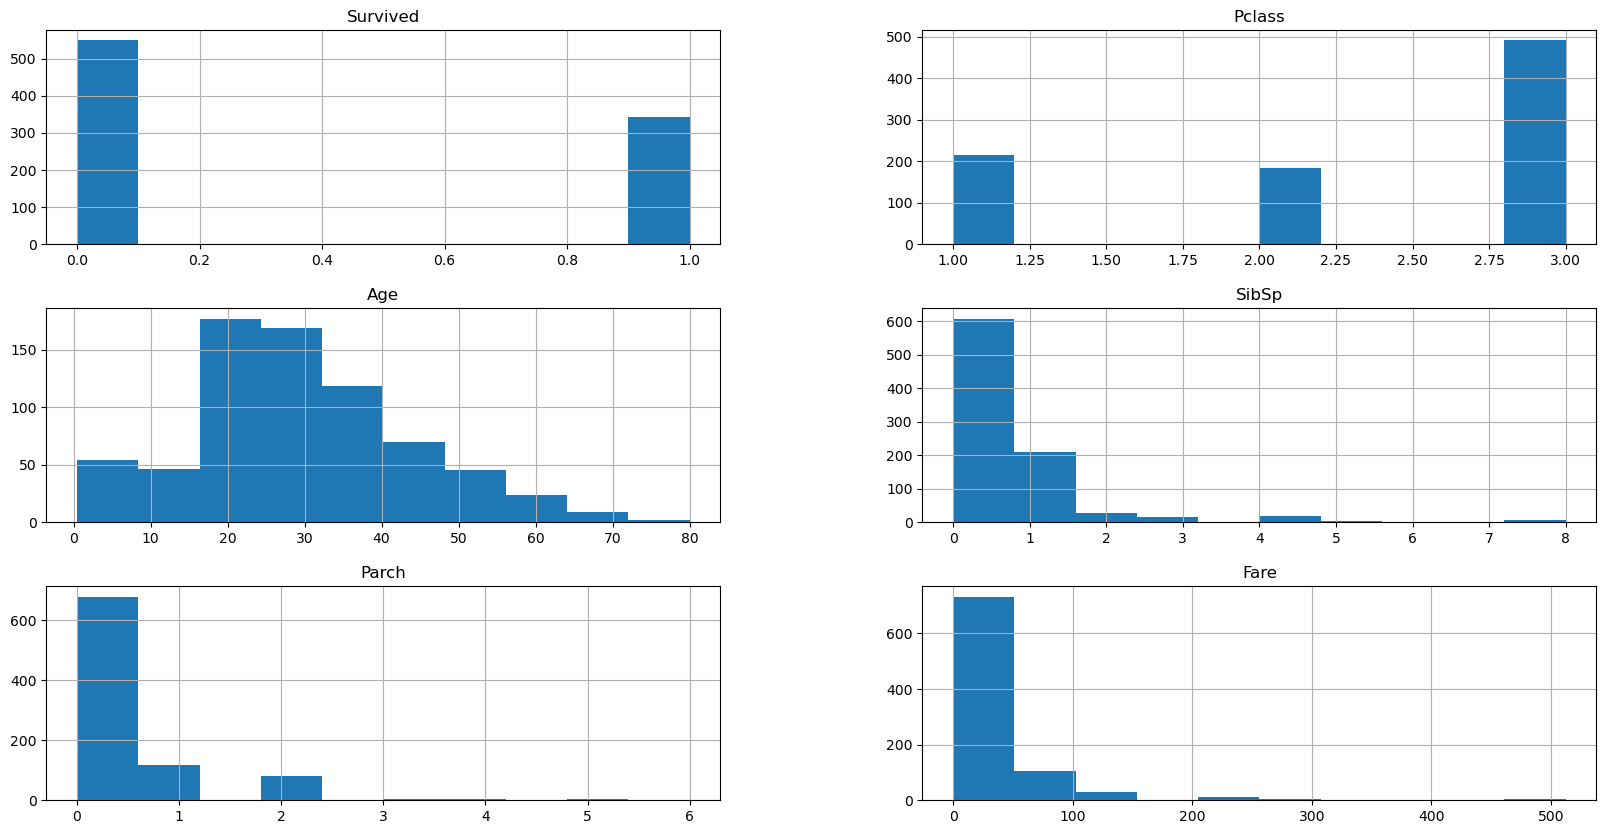

In [7]:
graphs = data.select_dtypes(include = ['int64', 'float64'])
graphs.hist(figsize = (20,10))
plt.show()

In [93]:
#4. Filling missing data

In [8]:
#Checking relationship between class of travel (Pclass) and the null values in Cabin

null_cabin = data[data['Cabin'].isnull()]

null_cabin['Pclass'].value_counts()

Pclass
3    479
2    168
1     40
Name: count, dtype: int64

In [9]:
#Function to assign a new column based on Pclass data

def assign_cabin_class(row):
    pclass = row['Pclass']
    has_cabin = not pd.isnull(row['Cabin'])

    #If Pclass is not null
    if pd.notnull(pclass):
        if pclass == 1 and has_cabin:
            return 'Luxury Cabin'
        elif pclass == 2 and has_cabin:
            return 'Second Class Cabin'
        elif pclass == 3 and not has_cabin:
            return 'No Cabin'
    else:
        return 'Unknown' 

data['Cabin Class'] = data.apply(assign_cabin_class, axis=1)

#This is done under the assumption that 3rd class travellers were not assigned of a cabin, but merely bunkers.
#Titanic had an overwhelming amount of passagers and it's highly likely to have zero information on the location-
#- since people randomly took a floor near to ballast.
#The previous output can be used to make the assumptions since majority of the Null values are from -
# - 3rd class tickets compared to the rest
#If 1st class and 2nd class passengers have null values, it's replaced with unknown.

In [19]:
data.drop('Cabin', axis = 1, inplace = True)

In [21]:
#Label Encoding Cabin Class

le = sk.LabelEncoder()
data['Cabin Class'] = le.fit_transform(data['Cabin Class'])

In [20]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin Class
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [13]:
#Age group distribution is center skewed. Mean filling is taken up.

data['Age'] = data['Age'].fillna(data['Age'].mean())

In [14]:
#Mode data is used to fill the missing 2 values

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [22]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin Class
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,3
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,1


In [23]:
data.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin Class    0
dtype: int64

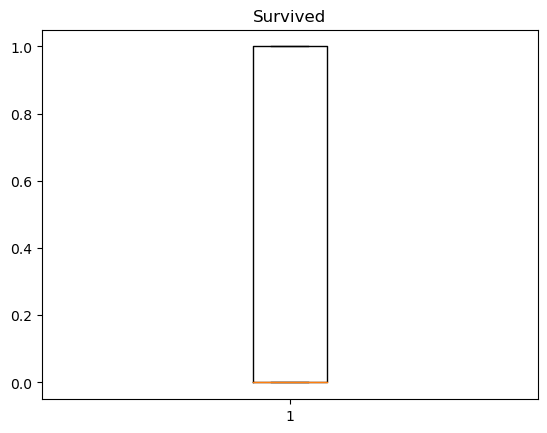

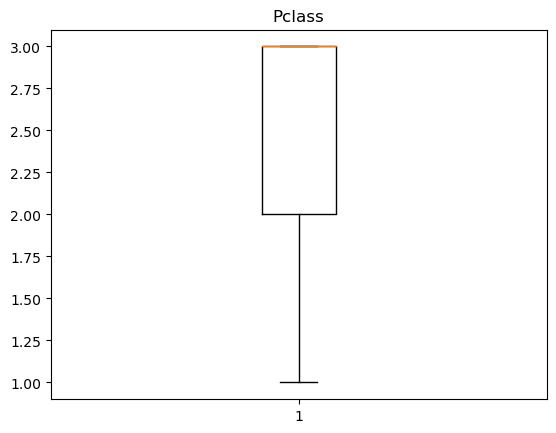

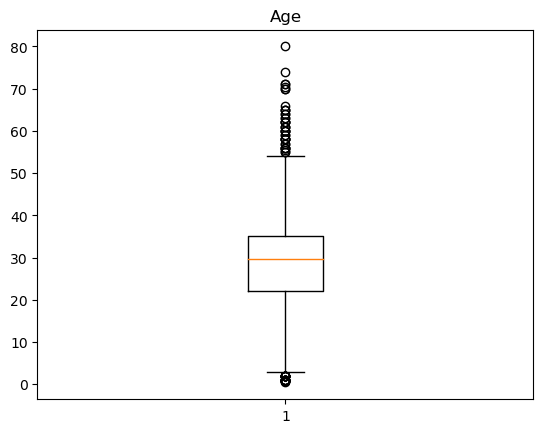

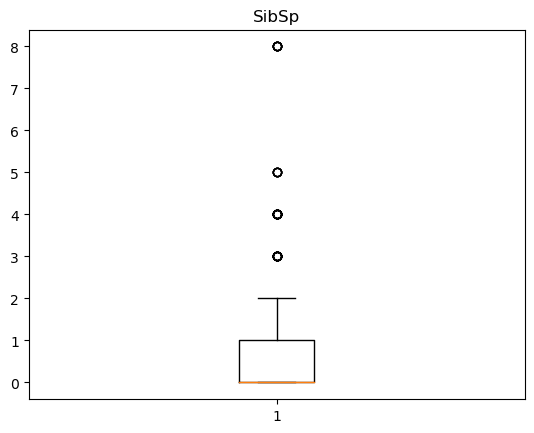

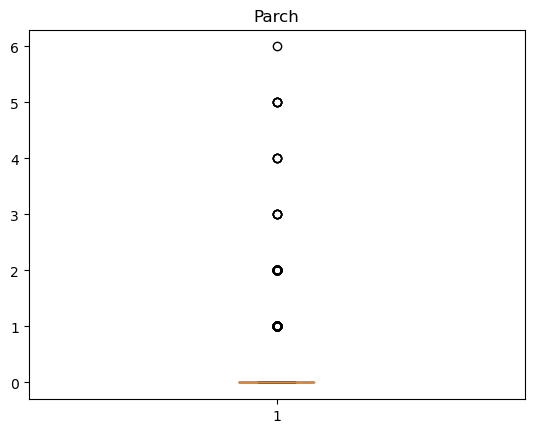

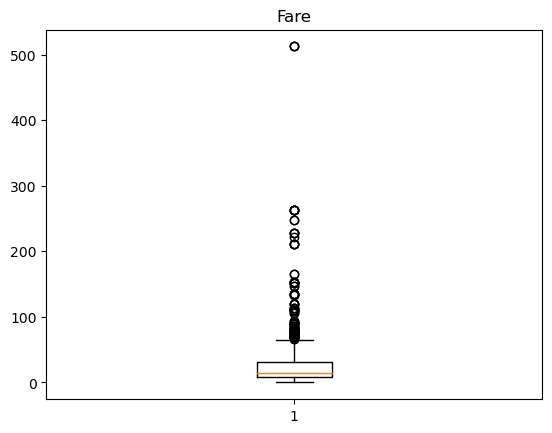

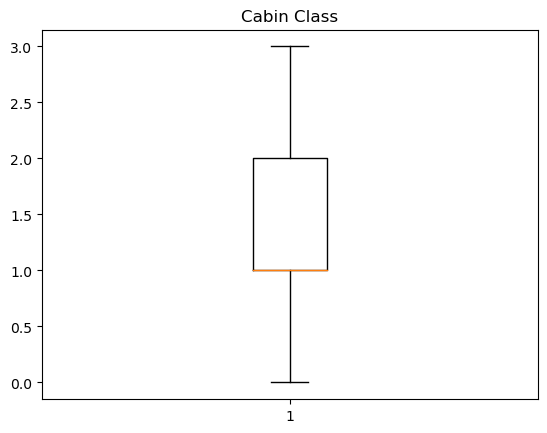

In [24]:
num_cols = data.select_dtypes(include = ['int64', 'float64'])
for i in num_cols:
        plt.boxplot(data[i])
        plt.title(f"{i}")
        plt.show()

In [25]:
# 5. Handling Outliers in 3 columns, Age, Fare, Parch, and SibSp using IQR

def iqr_clipping(data, columns):
    data_new = data.copy()  # Create a copy of the original data to avoid modifying it directly
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        low_lim = Q1 - 1.5 * IQR
        up_lim = Q3 + 1.5 * IQR
        data_new[col] = data_new[col].clip(lower=low_lim, upper=up_lim)
    return data_new

columns = ['Age', 'Fare', 'Parch', 'SibSp']
data_new = iqr_clipping(data, columns)

In [26]:
data_new

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin Class
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1.0,0,A/5 21171,7.2500,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0,PC 17599,65.6344,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0.0,0,STON/O2. 3101282,7.9250,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0,113803,53.1000,S,0
5,0,3,"Allen, Mr. William Henry",male,35.000000,0.0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0.0,0,211536,13.0000,S,3
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0.0,0,112053,30.0000,S,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1.0,0,W./C. 6607,23.4500,S,1


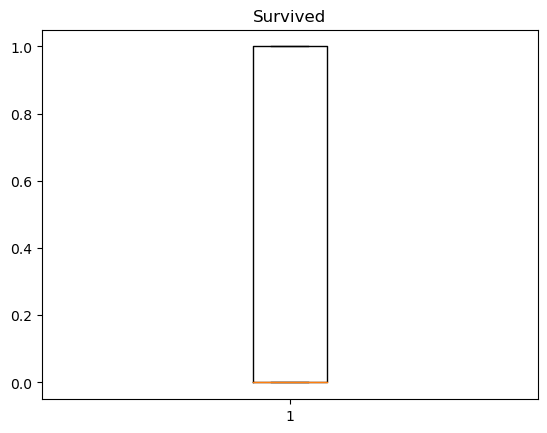

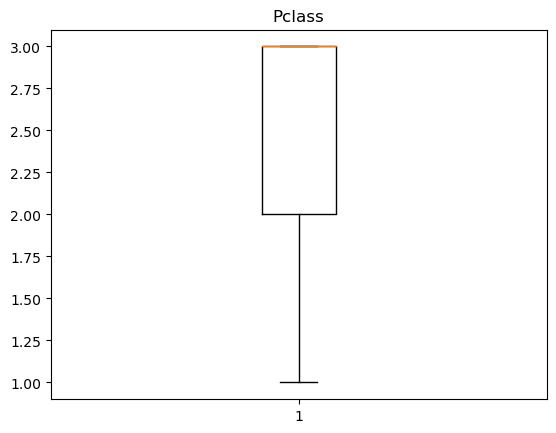

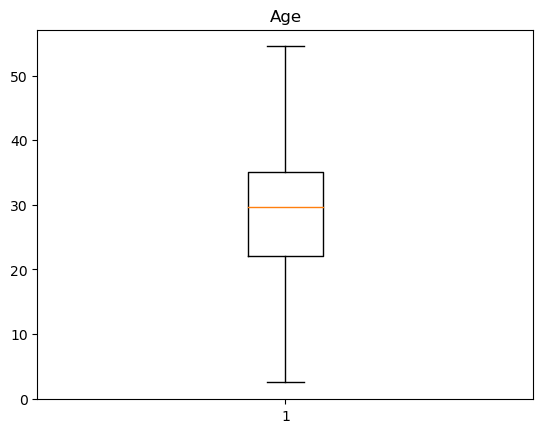

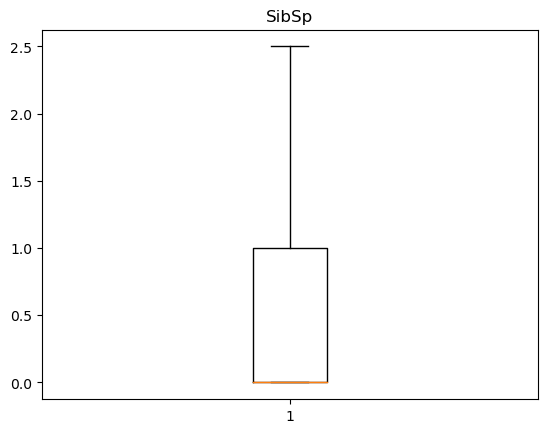

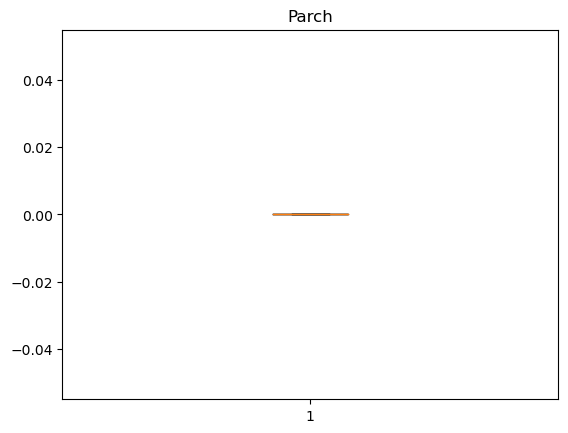

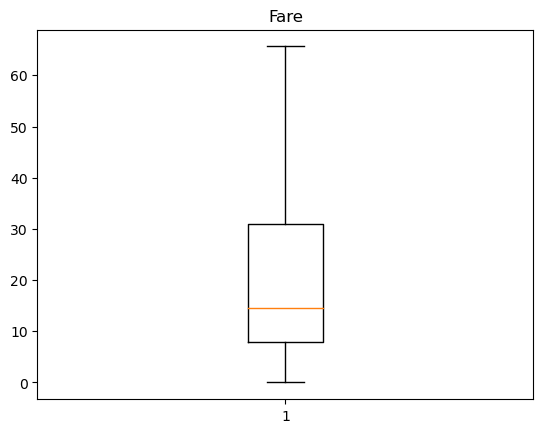

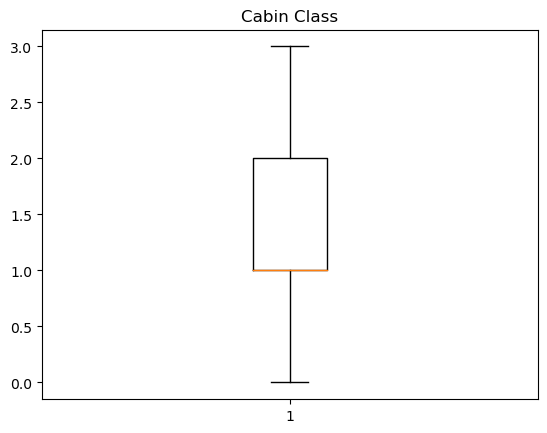

In [27]:
#Checking outliers in new DataFrame

num_cols = data_new.select_dtypes(include = ['int64', 'float64'])
for i in num_cols:
        plt.boxplot(data_new[i])
        plt.title(f"{i}")
        plt.show()

In [30]:
#6. Min Max scaling on the feature set with ‘Survived’ as target.

num_columns = data_new.select_dtypes(include=['float64', 'int64']).columns
x = data_new[num_columns].drop('Survived', axis=1)
minmax = sk.MinMaxScaler(feature_range = (0,1))
x_minmax = minmax.fit_transform(x)
x_minmax = pd.DataFrame(x_minmax)
x_minmax.describe()

,0,1,2,3,4,5
count,891.000000,891.000000,891.000000,891.0,891.000000,891.000000
mean,0.654321,0.516862,0.170595,0.0,0.366375,0.438085
std,0.418036,0.231962,0.283298,0.0,0.312056,0.350496
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.500000,0.375000,0.000000,0.0,0.120522,0.333333
50%,1.000000,0.523060,0.000000,0.0,0.220223,0.333333
75%,1.000000,0.625000,0.400000,0.0,0.472313,0.666667
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


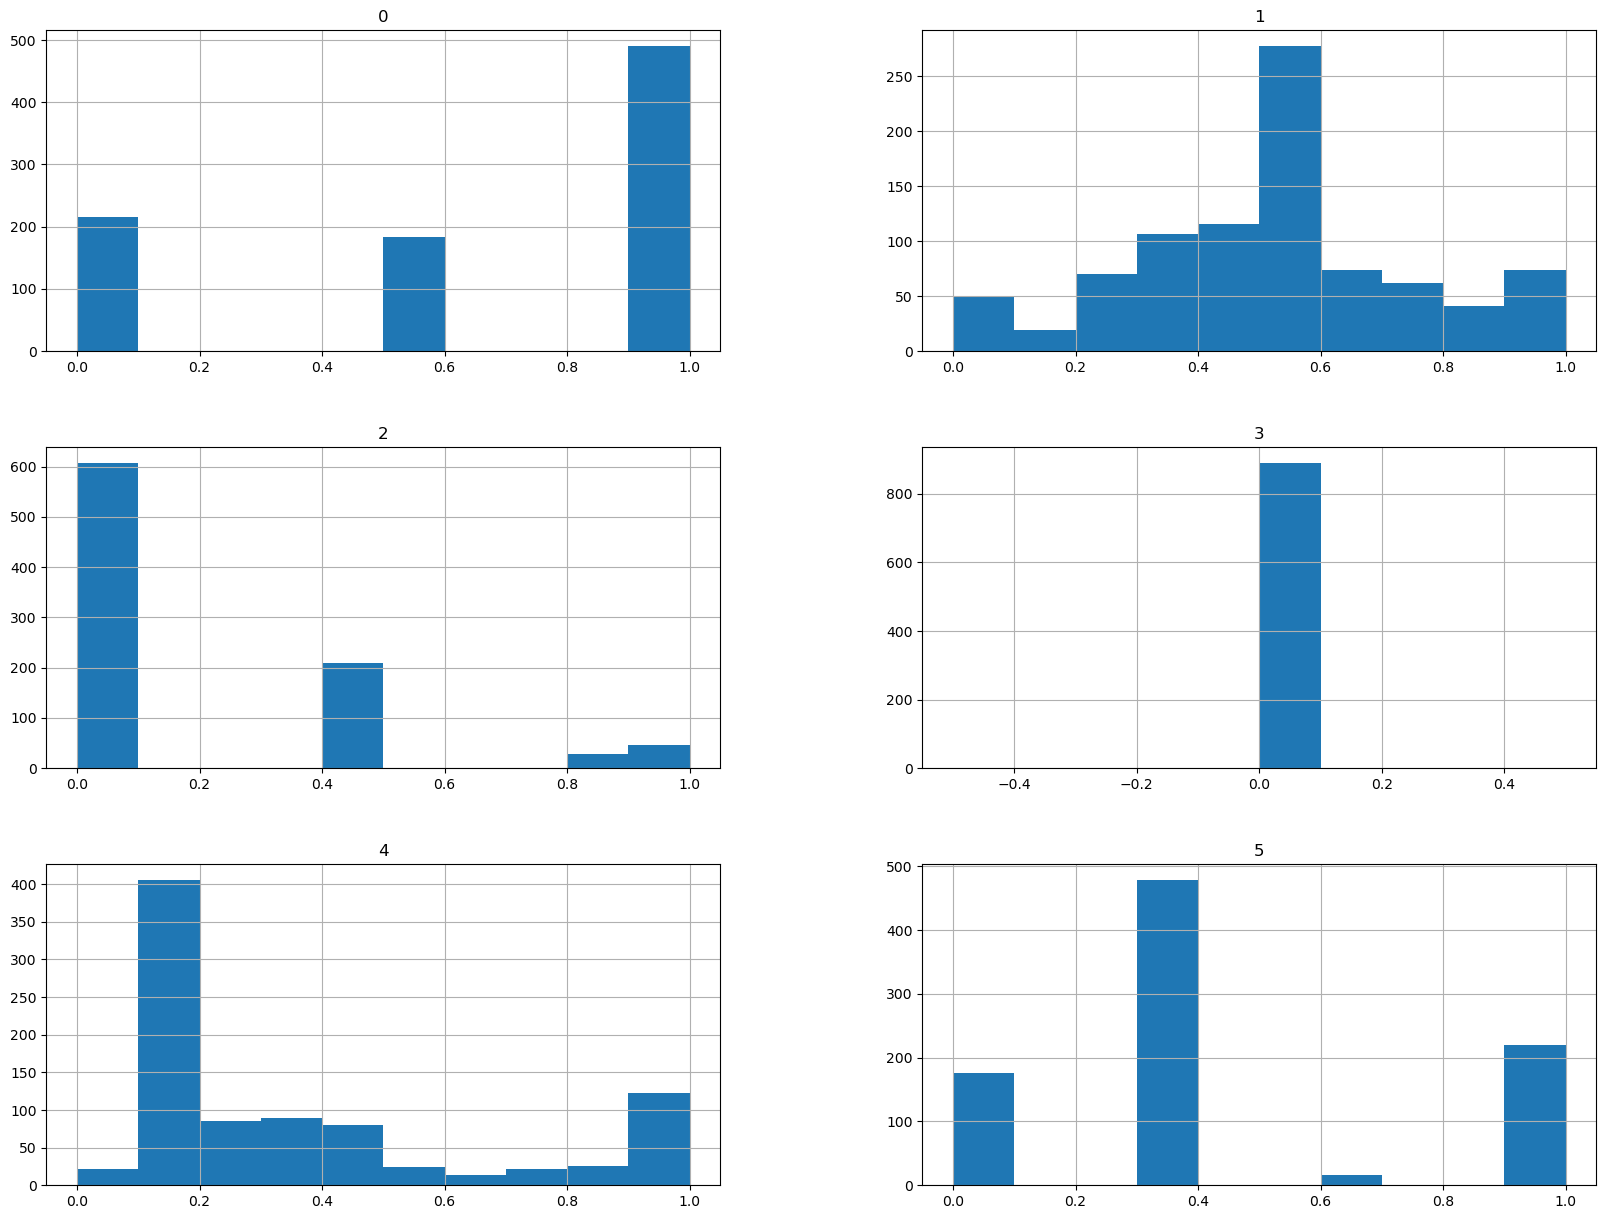

In [31]:
x_minmax.hist(figsize = (20,15))
plt.show()

In [32]:
x_minmax

,0,1,2,3,4,5
0,1.0,0.375000,0.4,0.0,0.110460,0.333333
1,0.0,0.682692,0.4,0.0,1.000000,0.000000
2,1.0,0.451923,0.0,0.0,0.120745,0.333333
3,0.0,0.625000,0.4,0.0,0.809027,0.000000
4,1.0,0.625000,0.0,0.0,0.122649,0.333333
...,...,...,...,...,...,...
886,0.5,0.471154,0.0,0.0,0.198067,1.000000
887,0.0,0.317308,0.0,0.0,0.457077,0.000000
888,1.0,0.523060,0.4,0.0,0.357282,0.333333
889,0.0,0.451923,0.0,0.0,0.457077,0.000000


In [33]:
x_minmax = x_minmax.reset_index(drop=True)
data_new = data_new.reset_index(drop=True)

data_scaled = x_minmax.join(data_new['Survived'])

In [34]:
data_scaled

,0,1,2,3,4,5,Survived
0,1.0,0.375000,0.4,0.0,0.110460,0.333333,0
1,0.0,0.682692,0.4,0.0,1.000000,0.000000,1
2,1.0,0.451923,0.0,0.0,0.120745,0.333333,1
3,0.0,0.625000,0.4,0.0,0.809027,0.000000,1
4,1.0,0.625000,0.0,0.0,0.122649,0.333333,0
...,...,...,...,...,...,...,...
886,0.5,0.471154,0.0,0.0,0.198067,1.000000,0
887,0.0,0.317308,0.0,0.0,0.457077,0.000000,1
888,1.0,0.523060,0.4,0.0,0.357282,0.333333,0
889,0.0,0.451923,0.0,0.0,0.457077,0.000000,1


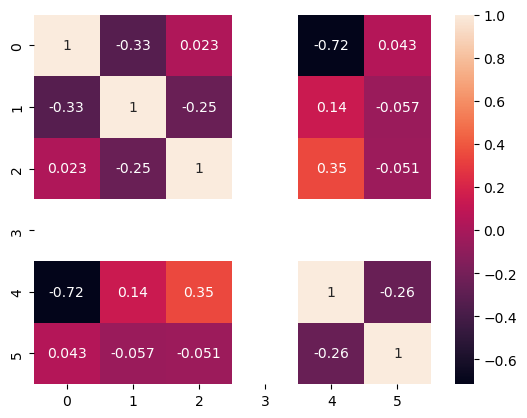

In [37]:
num_data = x_minmax.select_dtypes(include= ['int64','float64'])
corr_matrix = num_data.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

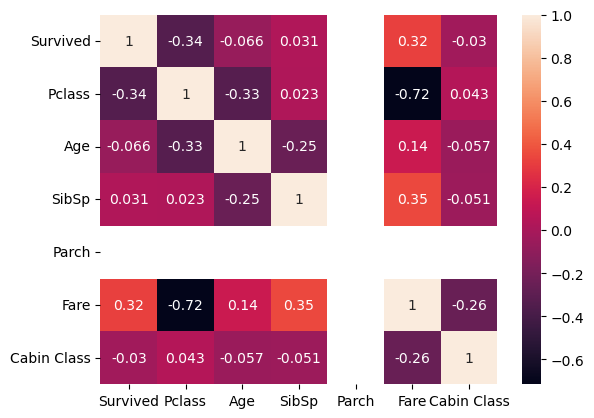

In [39]:
num_data = data_new.select_dtypes(include= ['int64','float64'])
corr_matrix2 = num_data.corr()
sns.heatmap(corr_matrix2, annot = True)
plt.show()

In [40]:
data_new.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin Class
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6344,C,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,S,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,S,1
